# regularization ( + vào hàm loss 1 lượng lamda* w)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


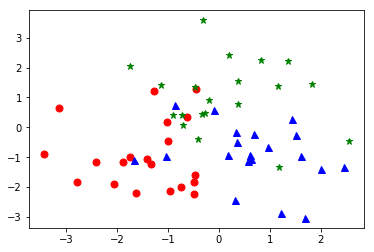

iter 0, loss: 1.098829
iter 1000, loss: 0.278157
iter 2000, loss: 0.270811
iter 3000, loss: 0.926845
iter 4000, loss: 0.206477
iter 5000, loss: 0.182699
iter 6000, loss: 0.112439
iter 7000, loss: 0.089329
iter 8000, loss: 0.074219
iter 9000, loss: 0.064312
training accuracy: 98.33 %
(1, 89600)


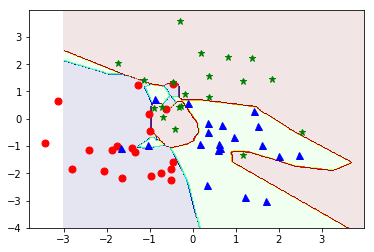

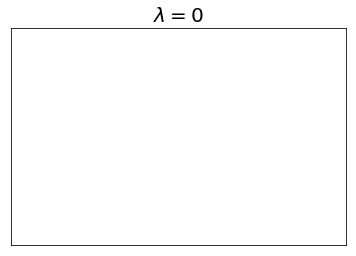

iter 0, loss: 1.103133
iter 1000, loss: 0.958158
iter 2000, loss: 0.969756
iter 3000, loss: 0.970647
iter 4000, loss: 0.970697
iter 5000, loss: 0.970829
iter 6000, loss: 0.970824
iter 7000, loss: 0.970967
iter 8000, loss: 0.971004
iter 9000, loss: 0.971043
training accuracy: 80.00 %
(1, 89600)


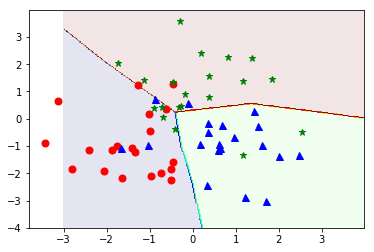

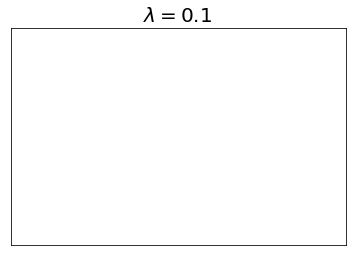

iter 0, loss: 1.099254
iter 1000, loss: 0.589874
iter 2000, loss: 0.590753
iter 3000, loss: 0.590899
iter 4000, loss: 0.591121
iter 5000, loss: 0.591018
iter 6000, loss: 0.591309
iter 7000, loss: 0.590971
iter 8000, loss: 0.591112
iter 9000, loss: 0.591223
training accuracy: 81.67 %
(1, 89600)


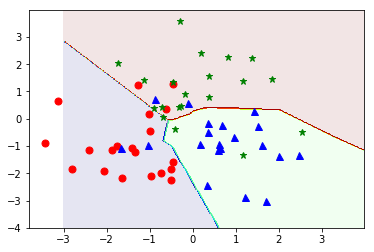

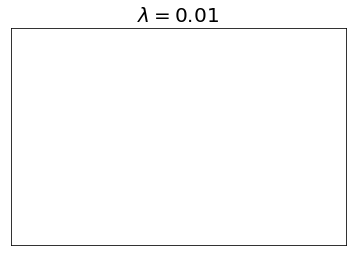

iter 0, loss: 1.121212
iter 1000, loss: 1.169700
iter 2000, loss: 1.169700
iter 3000, loss: 1.169700
iter 4000, loss: 1.169700
iter 5000, loss: 1.169700
iter 6000, loss: 1.169700
iter 7000, loss: 1.169700
iter 8000, loss: 1.169700
iter 9000, loss: 1.169700
training accuracy: 61.67 %
(1, 89600)


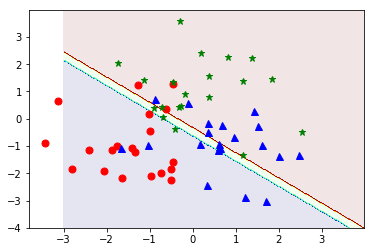

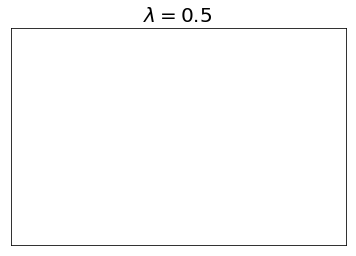

In [39]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
np.random.seed(2)
means =[[-1,-1],[1,-1],[0,1]]
cov  = [[1,0],[0,1]]
N =20
X0 = np.random.multivariate_normal(means[0],cov,N)
X1 = np.random.multivariate_normal(means[1],cov,N)
X2 = np.random.multivariate_normal(means[2],cov,N)
X = np.concatenate((X0,X1,X2),axis =0)
# print(X)
K = 3
original_labels = np.asarray([0]*N + [1]*N + [2]*N).T
print(original_labels)
def kmean_display(X, labels):
    K = np.amax(labels)+1
    X0 = X[labels ==0,:]
    X1 = X[labels ==1,:]
    X2 = X[labels ==2,:]
    plt.plot(X0[:,0],X0[:,1],'ro', markersize =7)
    plt.plot(X1[:,0],X1[:,1],'b^', markersize =7)
    plt.plot(X2[:,0],X2[:,1],'g*', markersize =7)
    plt.show()
kmean_display(X,original_labels)
y = original_labels.T
X =X.T
def softmax(s):
    e_s = np.exp(s- np.max(s,axis = 0, keepdims= True))
    return e_s/e_s.sum(axis =0)
# one hot coding
from scipy import sparse
def convert_labels(y, C=3):
    Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape =(C, len(y))).toarray()
    return Y
# cost function
lam = 0.1 # regularization
def cost(Y, Yhat, W1, W2, lam):
    return - np.sum(Y*np.log(Yhat))/Y.shape[1] + lam*(np.linalg.norm(W1)**2 + np.linalg.norm(W2)**2)
d0 =2 # node input
d1 = 100 # node of hidden layer
d2 =3 # 3 class

def mynet(lam):
    # initialize parameters randomely 
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    # X = X.T # each column of X is a data point 
    Y = convert_labels(y)
    N = X.shape[1]
    eta = 1 # learning rate 
    for i in range(10000):
        ## Feedforward 
        Z1 = np.dot(W1.T, X) + b1 
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        # import pdb; pdb.set_trace()  # breakpoint 035ab9b5 //
        Yhat = softmax(Z2)

        # compute the loss: average cross-entropy loss
        

        # print loss after each 1000 iterations
        if i %1000 == 0: 
            loss = cost(Y, Yhat, W1, W2, lam)
            print("iter %d, loss: %f" %(i, loss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T) + lam*W2 # (+ lamda*W : tránh overfitting): regularization
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU 
        dW1 = np.dot(X, E1.T) + lam*W1  # (+ lamda*W : tránh overfitting)
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # Gradient Descent update 
        # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
        W1 += -eta*dW1 
        b1 += -eta*db1 
        W2 += -eta*dW2
        b2 += -eta*db2 
#     return (W1, W2, b1, b2)




    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    predicted_class = np.argmax(Z2, axis=0)
    acc = (100*np.mean(predicted_class == y))
    print('training accuracy: %.2f %%' % acc)


    xm = np.arange(-3, 4, 0.025)
    xlen = len(xm)
    ym = np.arange(-4, 4, 0.025)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)

    print(np.ones((1, xx.size)).shape)
    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)

    X0 = np.vstack((xx1, yy1))

    Z1 = np.dot(W1.T, X0) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    # predicted class 
    Z = np.argmax(Z2, axis=0)

    Z = Z.reshape(xx.shape)
    CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

    kmean_display(X.T, original_labels.T)

    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    
    plt.title('$\lambda =$' + str(lam), fontsize = 20)
    fn = 'nnet_reg'+ str(lam) + '.png'
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()

mynet(0) # overfitting
mynet(0.1) 
mynet(0.01)
mynet(0.5) # underfitting